# **MetaboTandem**

# D. Statistical Analysis

# 1. Data Normalization

This Notebook allows to merge and rearrange the SIRIUS output into dataframes

## 1.1 Loading libraries

In [58]:
library(grid)
library(vegan)
library(gridExtra)
library(factoextra)
library(tidyverse)
source('functions_statistics.R')

### Setting output variables

In [2]:
figures_dir <- file.path('..', '..', '..', 'figures')
tables_dir <- file.path('..', '..', '..', 'tables')

## 1.2 User Inputs Required <====
Provide the following variables:
- **feature_table_file:** Path of the file with the feature intensities
- **metadata_file:** Path of the file with the sample information

In [6]:
feature_table_file <- file.path(tables_dir, 'b_feature_abundance_matrix.csv')
metadata_file <- '../../../data/metadata.csv'

## 1.3 Opening data tables

In [38]:
feature_abundances <- read_csv(feature_table_file) %>% column_to_rownames(var = 'FeatureID') %>% rename_with(~ gsub('_peak_area', '', .x))
metadata <- read_csv(metadata_file)

Rows: 213 Columns: 9
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): FeatureID
dbl (8): RP_S41_peak_area, RP_S42_peak_area, RP_S43_peak_area, RP_S44_peak_a...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): FileName, SampleID, treatment

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1.4 Testing multiple normalization methods

[1] "Table not saved"
[1] "Table not saved"
[1] "Table not saved"
[1] "Table not saved"
[1] "Table not saved"


Warning message:
"Removed 200 rows containing non-finite values (stat_boxplot)."
Saving 6.67 x 6.67 in image



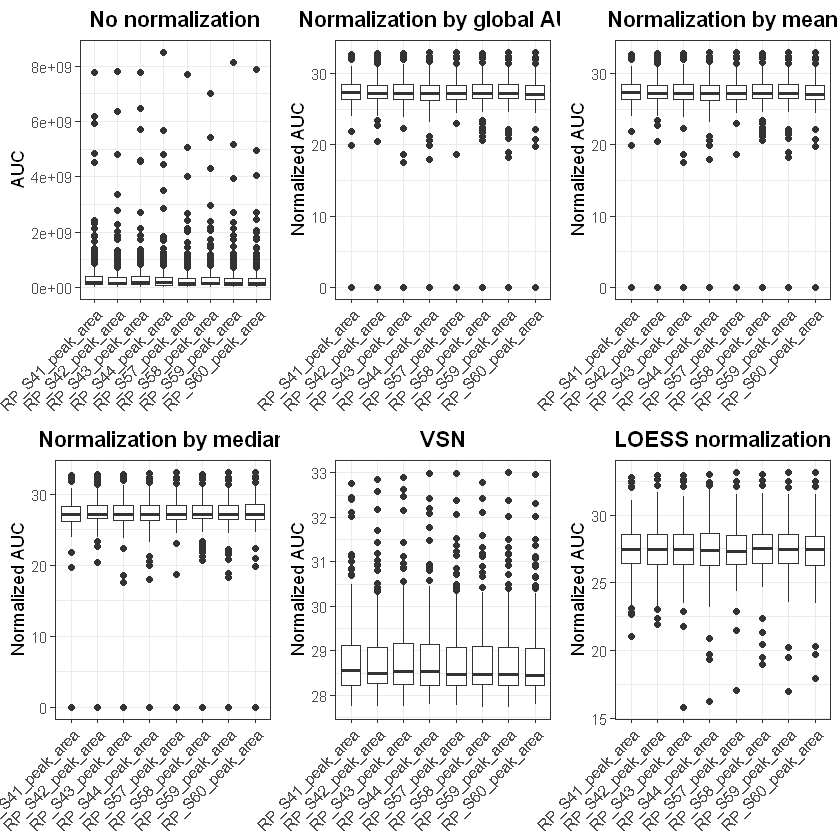

In [28]:
normalization_plot <- normalize_by_all(feature_abundances, save.figure = file.path(figures_dir, 'normalization_test.png'))

In [39]:
norm_features  <- vsn.norm(feature_abundances, save.table = file.path(tables_dir, 'normalized_feature_abundances.csv'))

## 1.5 Multivariate statistics

## 1.5.1 NMDS

[1] "Relative abundance method selected"
Run 0 stress 9.724171e-05 
Run 1 stress 9.68307e-05 
... New best solution
... Procrustes: rmse 0.000204096  max resid 0.0003987703 
... Similar to previous best
Run 2 stress 9.885934e-05 
... Procrustes: rmse 0.0002089092  max resid 0.0004075963 
... Similar to previous best
Run 3 stress 0.1828897 
Run 4 stress 9.922094e-05 
... Procrustes: rmse 4.808749e-05  max resid 0.0001017119 
... Similar to previous best
Run 5 stress 9.68027e-05 
... New best solution
... Procrustes: rmse 0.0003682391  max resid 0.0006242652 
... Similar to previous best
Run 6 stress 0.2852162 
Run 7 stress 9.992349e-05 
... Procrustes: rmse 0.0004502861  max resid 0.0008334292 
... Similar to previous best
Run 8 stress 0.203162 
Run 9 stress 9.704289e-05 
... Procrustes: rmse 0.0004145076  max resid 0.0008682322 
... Similar to previous best
Run 10 stress 0.1877195 
Run 11 stress 9.626703e-05 
... New best solution
... Procrustes: rmse 0.0001414651  max resid 0.00029712

Warning message in metaMDS(dm, k = 2, maxit = 999, trymax = 500, wascores = TRUE):
"stress is (nearly) zero: you may have insufficient data"
Saving 6.67 x 6.67 in image



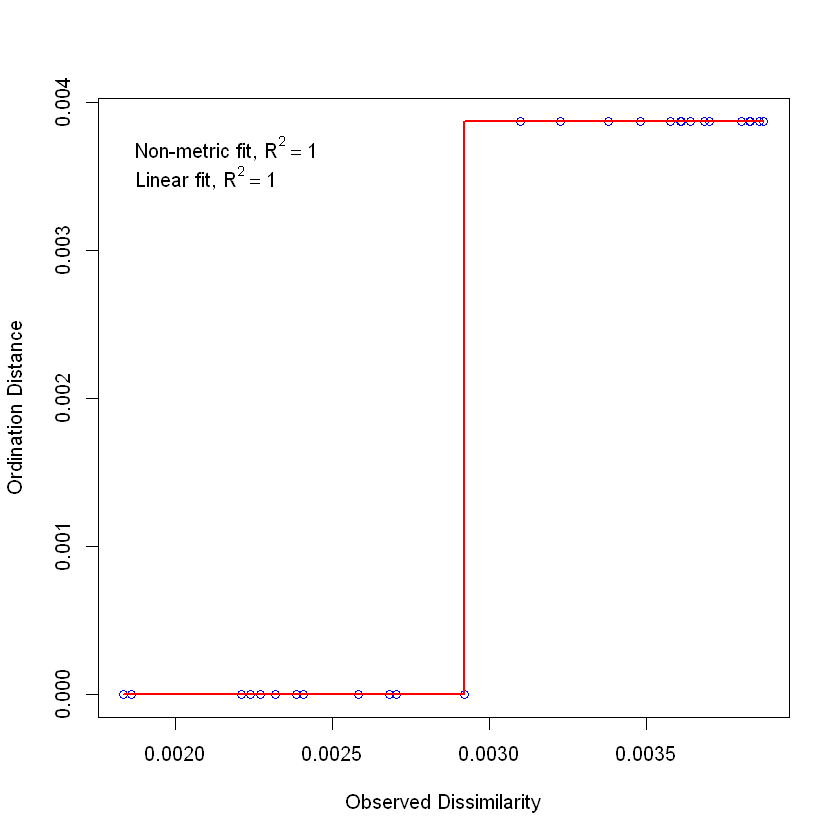

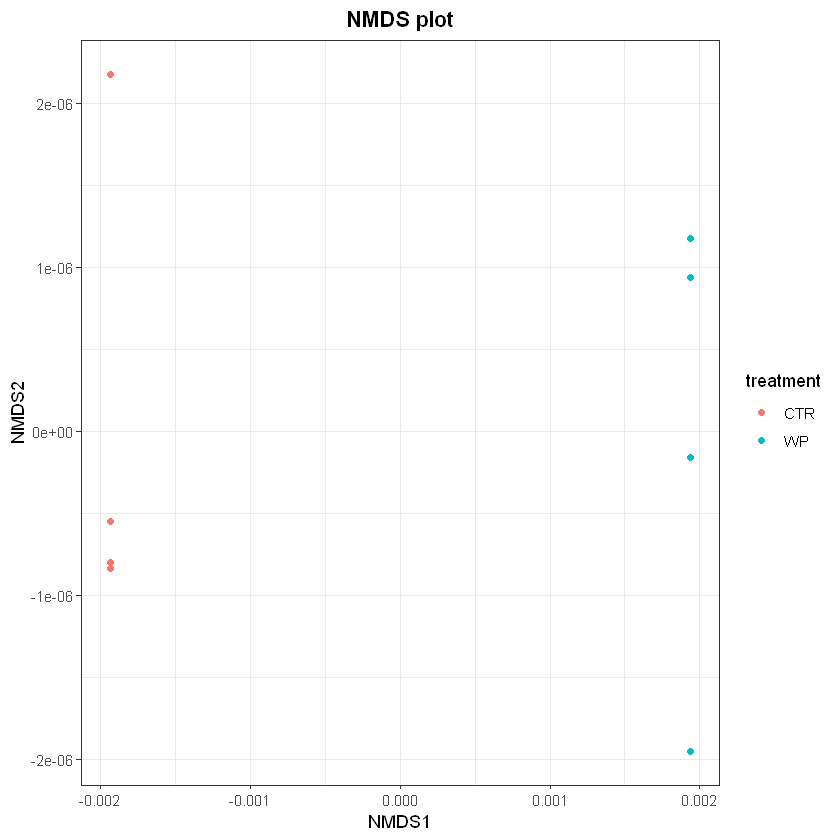

In [47]:
nmds <- nmds_ordination(norm_features, metadata, mode = 'ra', color_by = 'treatment', save.figure = file.path(figures_dir, 'nmds_plot.png'),
                       save.table = file.path(tables_dir, 'nmds_scores.csv'))

### 1.5.2 PCA

Saving 6.67 x 6.67 in image



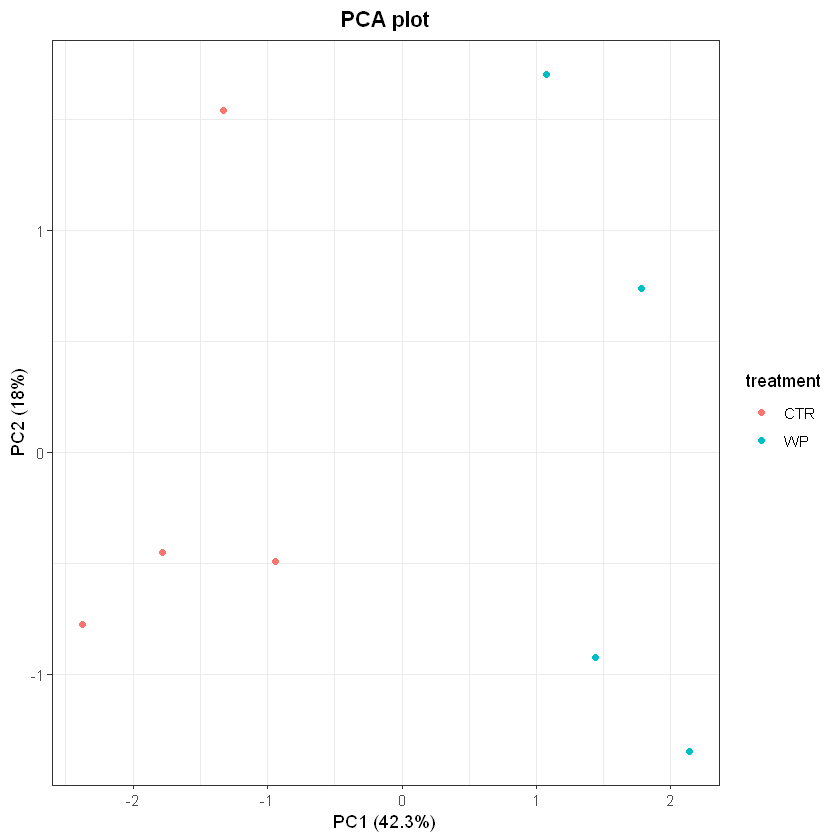

In [57]:
pca <- pca_ordination(norm_features, metadata, color_by = 'treatment', save.figure = file.path(figures_dir, 'pca_plot.png'),
                       save.table = file.path(tables_dir, 'pca_coordinates.csv'))

## 1.5.3 PERMANOVA

In [59]:
permanova <- calculate_permanova(norm_features, metadata, mode = 'ra', group_by = 'treatment',
                                save.table = file.path(tables_dir, 'permanova_table.csv'))
permanova

[1] "Relative abundance method selected"



Call:
adonis(formula = formula, data = metadata, permutations = 999,      method = dm.method) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df  SumsOfSqs    MeanSqs F.Model      R2 Pr(>F)  
treatment  1 1.7709e-05 1.7709e-05  6.2154 0.50882  0.021 *
Residuals  6 1.7095e-05 2.8492e-06         0.49118         
Total      7 3.4804e-05                    1.00000         
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1